In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [104]:
# question1
data = pd.read_csv('user_profiles_for_ads.csv')
null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

(User ID                            0
 Age                                0
 Gender                             0
 Location                           0
 Language                           0
 Education Level                    0
 Likes and Reactions                0
 Followed Accounts                  0
 Device Usage                       0
 Time Spent Online (hrs/weekday)    0
 Time Spent Online (hrs/weekend)    0
 Click-Through Rates (CTR)          0
 Conversion Rates                   0
 Ad Interaction Time (sec)          0
 Income Level                       0
 Top Interests                      0
 dtype: int64,
 None,
            User ID  Likes and Reactions  Followed Accounts  \
 count  1000.000000          1000.000000        1000.000000   
 mean    500.500000          4997.084000         251.438000   
 std     288.819436          2838.494365         141.941557   
 min       1.000000           101.000000          10.000000   
 25%     250.750000          2661.250000         126.00

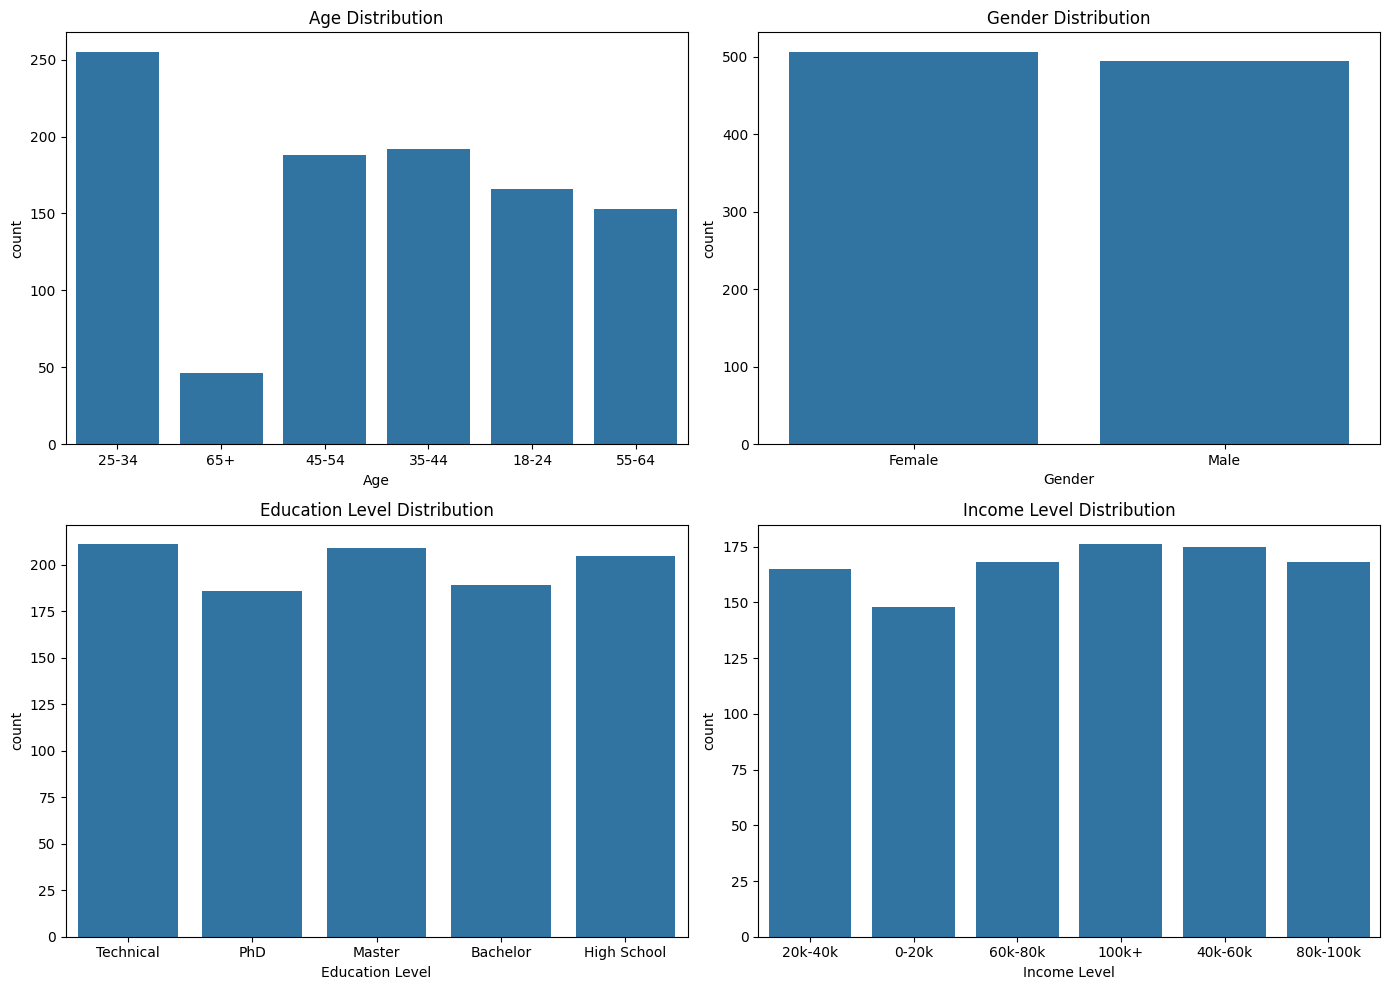

In [105]:
# question2

plt.figure(figsize=(14, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Age', data=data)
plt.title('Age Distribution')

# Gender distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Education Level distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Education Level', data=data)
plt.title('Education Level Distribution')

# Income Level distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Income Level', data=data)
plt.title('Income Level Distribution')

plt.tight_layout()
plt.show()


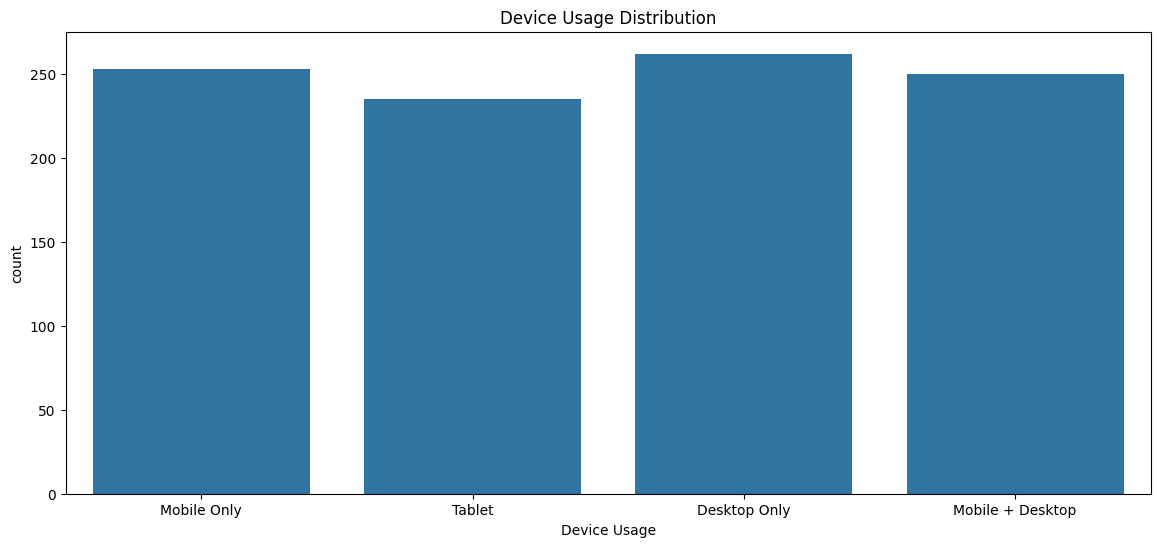

In [106]:
# question3

plt.figure(figsize=(14, 6))
sns.countplot(x='Device Usage', data=data)
plt.title('Device Usage Distribution')
plt.show()




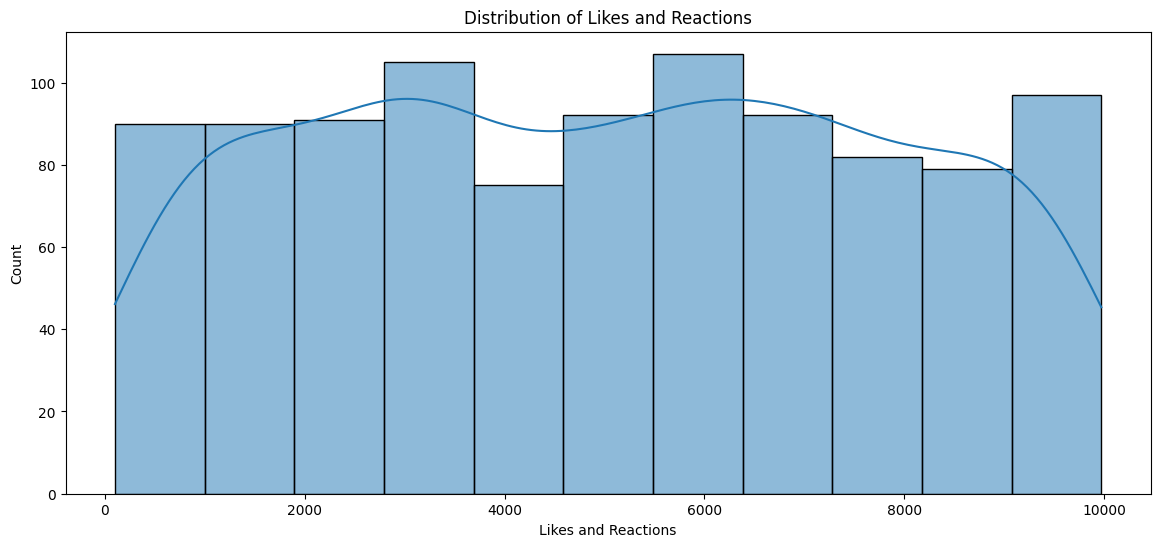

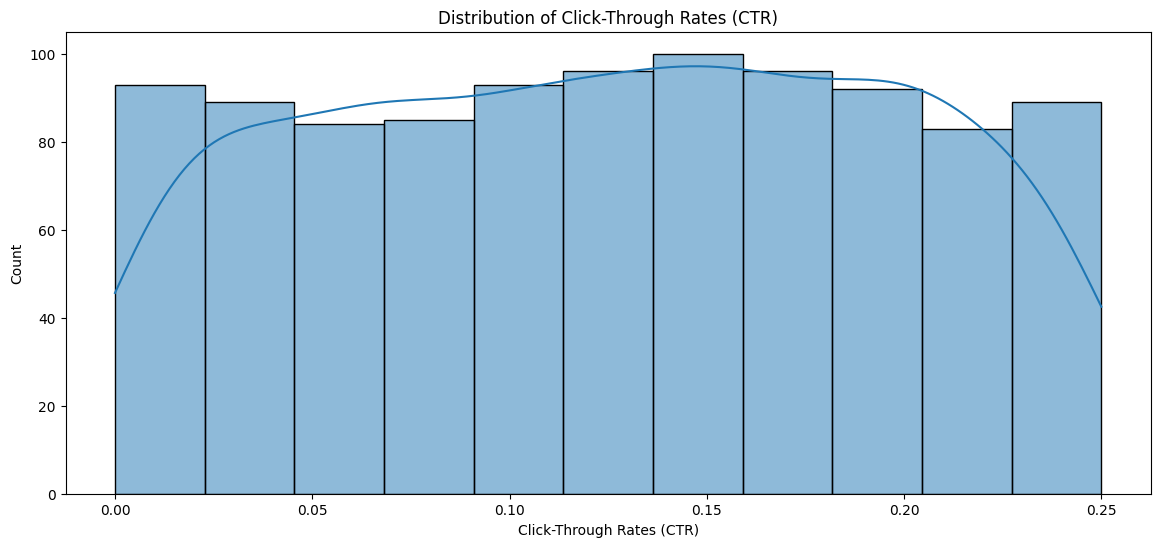

Average Time Spent Online on Weekdays: 2.76 hours
Average Time Spent Online on Weekends: 4.60 hours


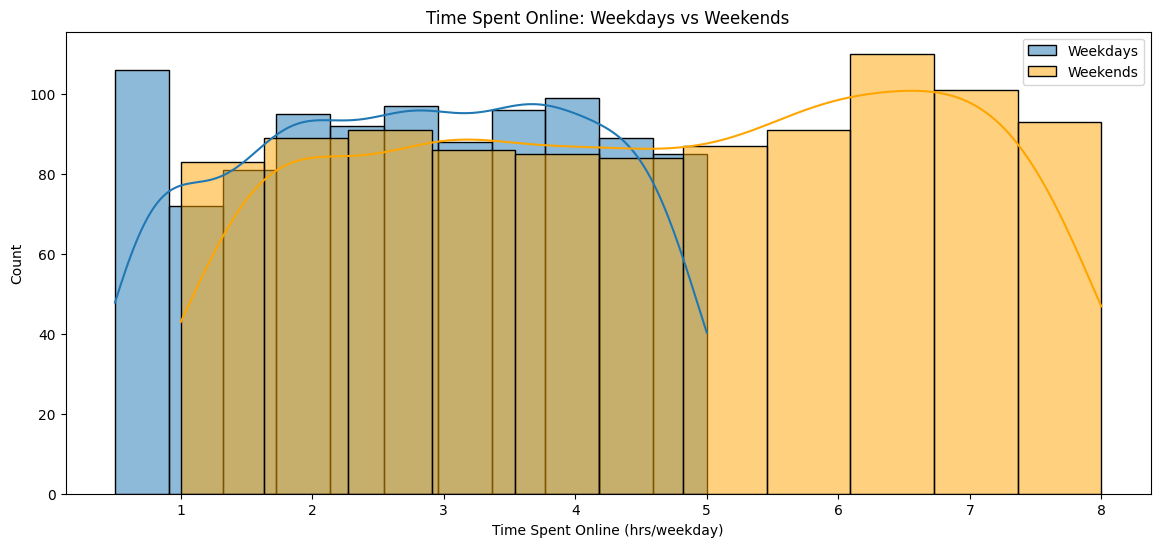

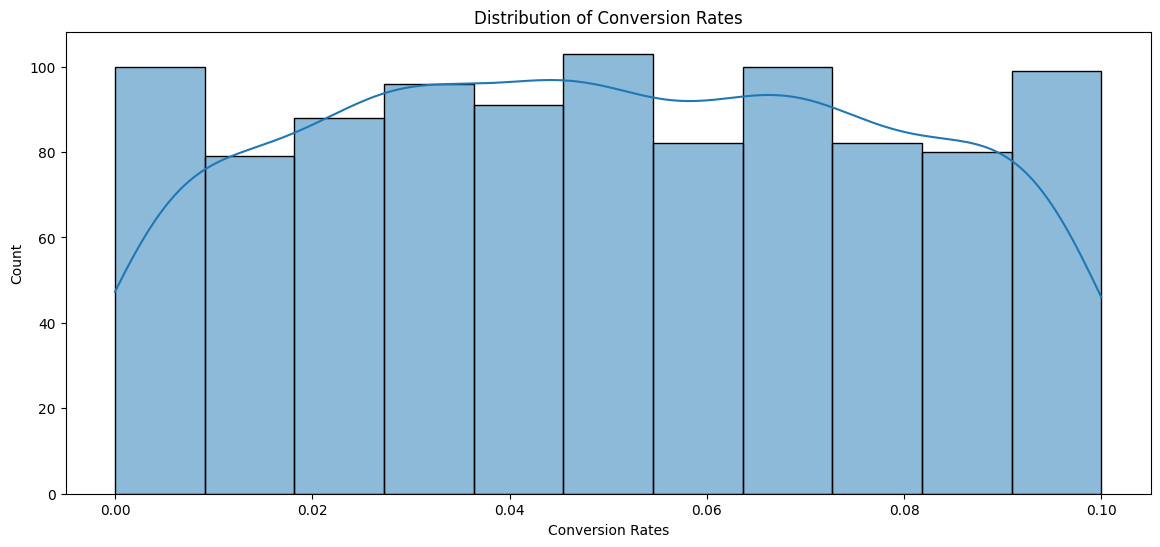

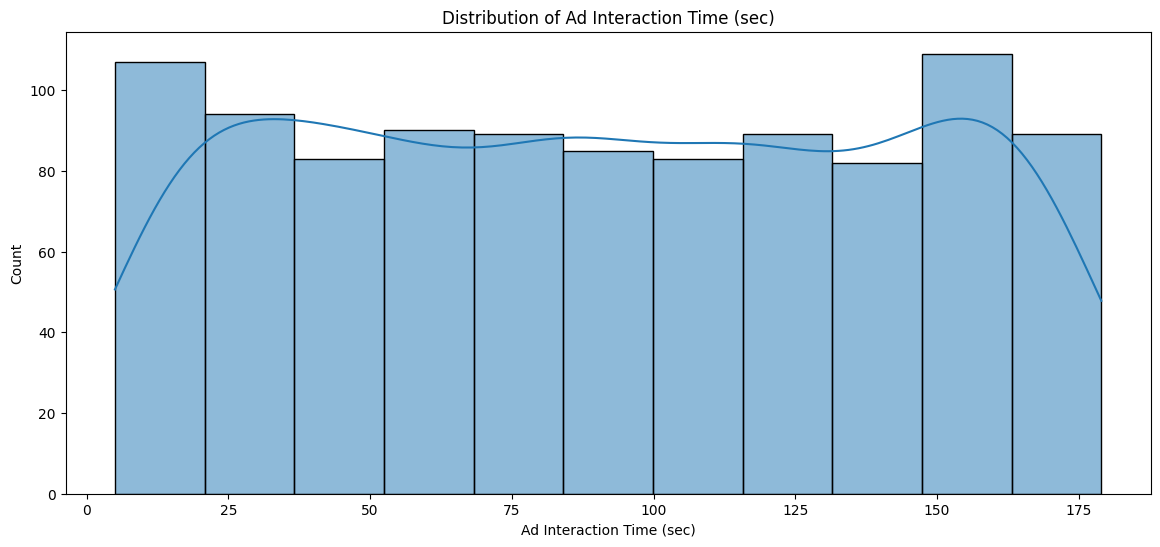

In [107]:
# question4

# likes & reactions
plt.figure(figsize=(14, 6))
sns.histplot(data['Likes and Reactions'], kde=True)
plt.title('Distribution of Likes and Reactions')
plt.show()

# click-through Rates
plt.figure(figsize=(14, 6))
sns.histplot(data['Click-Through Rates (CTR)'], kde=True)
plt.title('Distribution of Click-Through Rates (CTR)')
plt.show()

# Time spent online on weekdays vs. weekends
avg_weekday= data['Time Spent Online (hrs/weekday)'].mean()
avg_weekend = data['Time Spent Online (hrs/weekend)'].mean()

print(f'Average Time Spent Online on Weekdays: {avg_weekday:.2f} hours')
print(f'Average Time Spent Online on Weekends: {avg_weekend:.2f} hours')

plt.figure(figsize=(14, 6))
sns.histplot(data['Time Spent Online (hrs/weekday)'], kde=True, label='Weekdays')
sns.histplot(data['Time Spent Online (hrs/weekend)'], kde=True, color='orange', label='Weekends')
plt.title('Time Spent Online: Weekdays vs Weekends')
plt.legend()
plt.show()

# Conversion Rates
plt.figure(figsize=(14, 6))
sns.histplot(data['Conversion Rates'], kde=True)
plt.title('Distribution of Conversion Rates')
plt.show()

# Ad Interaction Time 
plt.figure(figsize=(14, 6))
sns.histplot(data['Ad Interaction Time (sec)'], kde=True)
plt.title('Distribution of Ad Interaction Time (sec)')
plt.show()


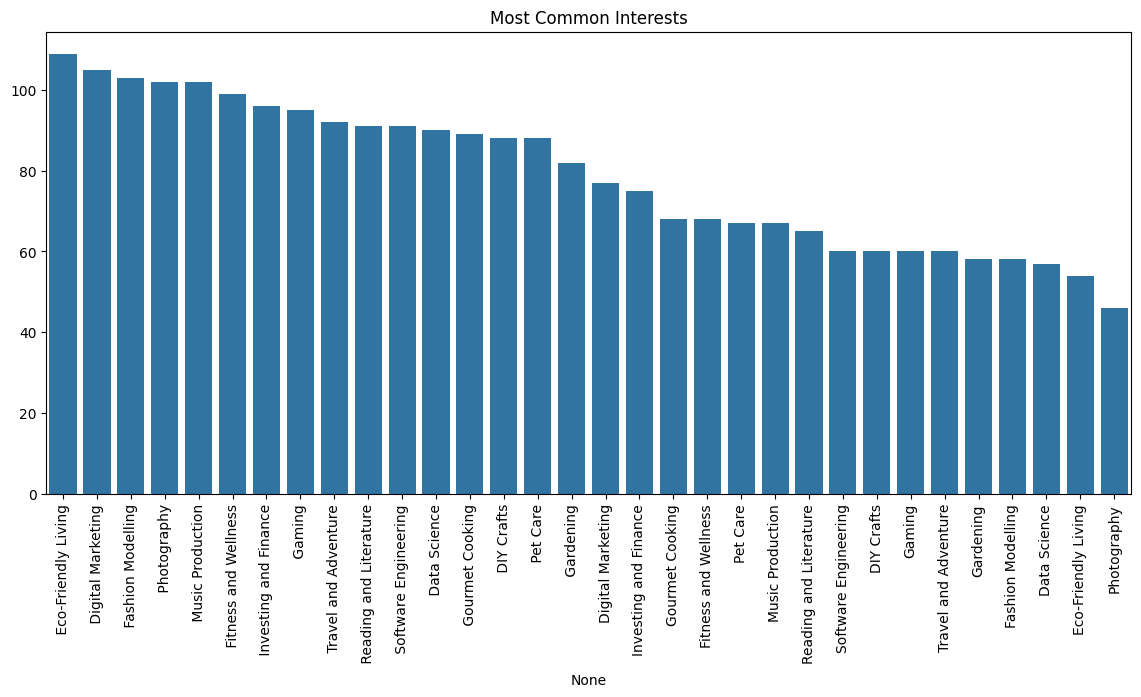

In [108]:
# question5

# Extract and count the top interests
top_interests = data['Top Interests'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_interests.index, y=top_interests.values)
plt.xticks(rotation=90)
plt.title('Most Common Interests')
plt.show()


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# question6 & 7 


features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']

# Convert 'Age' to numerical by taking the midpoint of each range
def age_to_midpoint(age_range):
    try:
        start, end = age_range.split('-')
        return (int(start) + int(end)) / 2
    except ValueError:
        return None

data['Age'] = data['Age'].apply(age_to_midpoint)

# Handle cases where 'Age' could not be converted
data = data.dropna(subset=['Age'])

# Convert categorical variables to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Income Level'] = data['Income Level'].map({'0-20k': 0, '20k-40k': 1, '40k-60k': 2, '60k-80k': 3, '80k-100k': 4, '100k+': 5})

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])


kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Compute mean values of numerical features and mode for categorical features within each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0],  # Mode
    'Income Level': lambda x: x.mode()[0],  # Mode
    'Time Spent Online (hrs/weekday)': 'mean',
    'Time Spent Online (hrs/weekend)': 'mean',
    'Likes and Reactions': 'mean',
    'Click-Through Rates (CTR)': 'mean',
    'Conversion Rates': 'mean',
    'Ad Interaction Time (sec)': 'mean'
}).reset_index()

print(cluster_summary)


cluster_names = {
    0: "Weekend Warriors",
    1: "Engaged Professionals",
    2: "Low-Key Users",
    3: "Active Explorers",
    4: "Budget Browsers"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)

print(data.head())


   Cluster        Age  Gender  Income Level  Time Spent Online (hrs/weekday)  \
0        0  34.777473       1             5                         3.865934   
1        1  45.960452       0             5                         3.261017   
2        2  35.830729       1             4                         1.871875   
3        3  38.312169       1             0                         2.339153   
4        4  39.331776       0             0                         2.617290   

   Time Spent Online (hrs/weekend)  Likes and Reactions  \
0                         4.722527          2759.175824   
1                         4.832203          6254.118644   
2                         5.082292          5095.161458   
3                         5.585185          4993.989418   
4                         3.027570          5837.985981   

   Click-Through Rates (CTR)  Conversion Rates  Ad Interaction Time (sec)  
0                   0.162566          0.052181                 118.620879  
1           

In [110]:
#q8

cluster_names = {
    0: "Weekend Warriors",
    1: "Engaged Professionals",
    2: "Low-Key Users",
    3: "Active Explorers",
    4: "Budget Browsers"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)
print(data.head())

# Print cluster summary
for cluster in cluster_summary['Cluster']:
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster]
    cluster_name = cluster_names[cluster]
    
    print(f"Cluster {cluster}: {cluster_name}")
    print(cluster_data)

   User ID   Age  Gender  Location Language Education Level  \
0        1  29.5       1  Suburban    Hindi       Technical   
2        3  49.5       1  Suburban  Spanish       Technical   
3        4  39.5       1     Rural  Spanish             PhD   
4        5  29.5       1     Urban  English       Technical   
5        6  29.5       1  Suburban    Hindi          Master   

   Likes and Reactions  Followed Accounts      Device Usage  \
0                 5640                190       Mobile Only   
2                 4775                187       Mobile Only   
3                 9182                152      Desktop Only   
4                 6848                371       Mobile Only   
5                 6203                257  Mobile + Desktop   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
2                              4.5                              5.6   
3                            

C:\Users\malia\AppData\Local\Temp\ipykernel_12240\429922564.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {int(row[0])}: {cluster_names[int(row[0])]}', color=colors[idx])


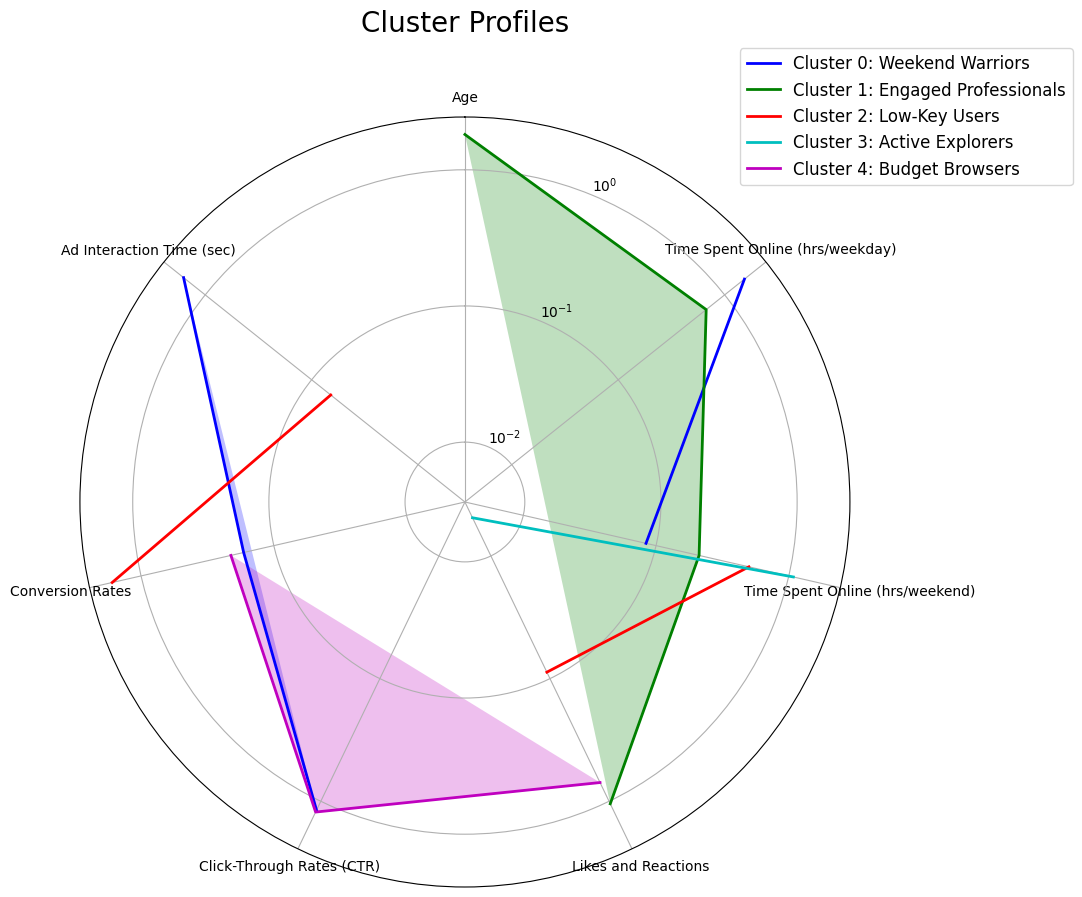

In [111]:
# question9

# function to create radar charts
def create_radar_chart(data, labels, title, colors):
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels)

    ax.set_rscale('log')
    ax.yaxis.set_tick_params(labelsize=10)

    for idx, row in data.iterrows():
        values = row[1:].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {int(row[0])}: {cluster_names[int(row[0])]}', color=colors[idx])
        ax.fill(angles, values, alpha=0.25, color=colors[idx])

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    plt.title(title, size=20, color='black', y=1.1)

    plt.show()

# features to plot on the radar chart
radar_features = ['Age', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']

# normalize the radar chart data
radar_data = cluster_summary[radar_features]
scaler = StandardScaler()
radar_data = scaler.fit_transform(radar_data)
radar_data = pd.DataFrame(radar_data, columns=radar_features)
radar_data.insert(0, 'Cluster', cluster_summary['Cluster'])

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

# Create the radar chart
create_radar_chart(radar_data, radar_features, 'Cluster Profiles', colors)


In [112]:
# # question10
# Summary of User Profiling and Segmentation Experience:

# Data Import and Initial Checks:

# Imported the dataset and performed initial checks for null values and descriptive statistics. This step helped identify the structure and quality of the data.
# Exploratory Data Analysis (EDA):

# Visualized the distribution of key demographic variables (age, gender, education level, and income level). This step provided insights into the demographics of the user base.
# Preprocessing and Feature Engineering:

# Converted age ranges to numerical midpoints and mapped categorical variables to numerical values. Standardized the data to ensure uniformity in feature scaling.
# Clustering:

# Applied KMeans clustering to segment users into distinct groups based on their characteristics. Computed the mean values of numerical features and the mode for categorical features within each cluster.
# Cluster Profiling:

# Created user profiles for each cluster, highlighting key characteristics and behaviors. Assigned descriptive names to clusters to reflect their defining traits.
# Visualization:

# Generated a radar chart to compare the mean values of selected features across clusters. This visual representation helped in understanding the distinct profiles of each user segment.
# Insights and Application:

# The clustering analysis revealed five distinct user segments, each with unique online behaviors and demographic characteristics. These insights can be used to tailor marketing strategies, personalize user experiences, and optimize ad targeting for better engagement and conversion rates.
# The process of user profiling and segmentation provides a structured approach to understanding and catering to diverse user needs, ultimately enhancing the effectiveness of data-driven strategies.